<a href="https://colab.research.google.com/github/nicobargioni/machine-learning/blob/main/BARGIONI_Nicolas_Desafio_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
# Semilla para reproducibilidad
np.random.seed(0)

# Generación de datos ficticios
num_filas = 1000

# Variables independientes
edad = np.random.randint(18, 65, num_filas)
genero = np.random.choice(['hombre', 'mujer'], num_filas)
nivel_educativo = np.random.choice(['primario', 'secundario', 'universitario'], num_filas)
experiencia_laboral = np.random.randint(0, 30, num_filas)
sector = np.random.choice(['IT', 'Ventas', 'Construcción', 'Salud', 'Educación'], num_filas)
ciudad = np.random.choice(['Ciudad A', 'Ciudad B', 'Ciudad C'], num_filas)

# Creación de la variable dependiente 'salario' con ruido aleatorio
salario = (
    20000 +
    (edad * np.random.uniform(20, 30)) +  # coeficiente desconocido para edad
    (experiencia_laboral * np.random.uniform(500, 1000)) +  # coeficiente desconocido para experiencia
    np.where(nivel_educativo == 'universitario', 10000, np.where(nivel_educativo == 'secundario', 5000, 0)) +
    np.random.normal(0, 5000, num_filas)  # ruido aleatorio
)

# Crear DataFrame
data = {
    'edad': edad,
    'genero': genero,
    'nivel_educativo': nivel_educativo,
    'experiencia_laboral': experiencia_laboral,
    'sector': sector,
    'ciudad': ciudad,
    'salario': salario
}
df = pd.DataFrame(data)

# Mostrar las primeras filas del dataset
df.head()

,edad,genero,nivel_educativo,experiencia_laboral,sector,ciudad,salario
0,62,mujer,universitario,13,Construcción,Ciudad A,42915.564969
1,18,hombre,universitario,17,Construcción,Ciudad B,38107.796920
2,21,mujer,primario,17,Ventas,Ciudad B,28189.867166
3,21,mujer,secundario,10,Salud,Ciudad B,35026.635704
4,57,hombre,universitario,8,Educación,Ciudad B,34996.057008


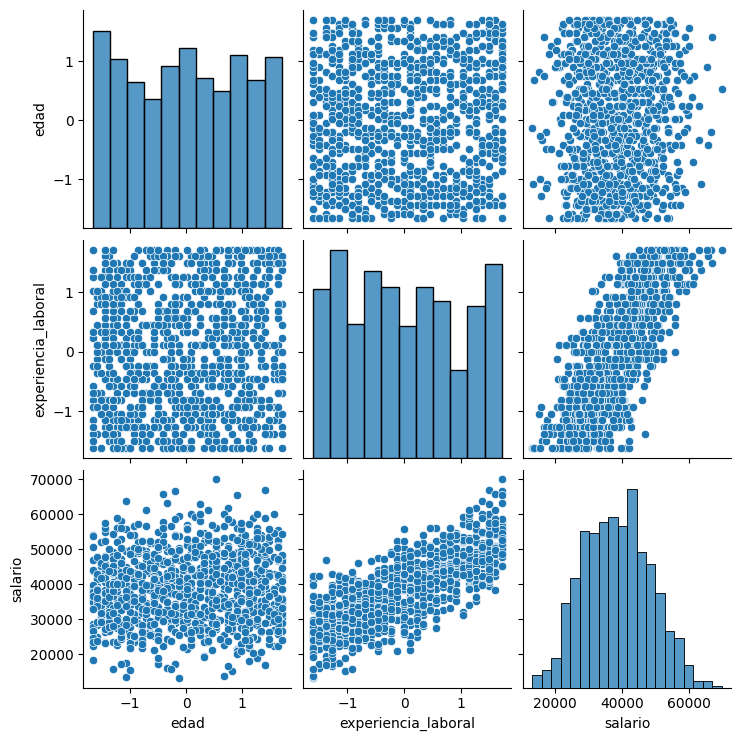

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seleccionar solo las variables numéricas relevantes para el análisis
variables_interes = df[['edad', 'experiencia_laboral', 'salario']]

# Crear el pairplot para visualizar todas las relaciones de una sola vez
sns.pairplot(variables_interes)
plt.show()

Describa como generó los datos.

1. Creo la variable numero de registros (num_filas) para que guarde 1000 valores

2. Creo 6 variables independientes
  * Edad: con números aleatorios entre 18 y 65
  * Género: con dos valores
  * Nivel eduativo: con primario, terciario y universitario
  * Experiencia laboral: de 0 a 30 años
  * Sector
  * Ciudad

3. Creo una variable independiente: salario
  * Intercepto: 2000
  * Elijo no darle los coeficientes para que los descubra el modelo

4. Creo un dataframe
5. Con pairplot veo las correlaciones más evidentes

## Preprocesamiento

Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

In [ ]:
#Creo variables dummies
df = pd.get_dummies(df, columns=['genero', 'nivel_educativo', 'sector', 'ciudad'], prefix=['genero', 'nivel', 'sector', 'ciudad'])

In [ ]:
df.head()

,edad,experiencia_laboral,salario,genero_hombre,genero_mujer,nivel_primario,nivel_secundario,nivel_universitario,sector_Construcción,sector_Educación,sector_IT,sector_Salud,sector_Ventas,ciudad_Ciudad A,ciudad_Ciudad B,ciudad_Ciudad C
0,62,13,42915.564969,False,True,False,False,True,True,False,False,False,False,True,False,False
1,18,17,38107.796920,True,False,False,False,True,True,False,False,False,False,False,True,False
2,21,17,28189.867166,False,True,True,False,False,False,False,False,False,True,False,True,False
3,21,10,35026.635704,False,True,False,True,False,False,False,False,True,False,False,True,False
4,57,8,34996.057008,True,False,False,False,True,False,True,False,False,False,False,True,False


In [ ]:
#Con StandardScaler escalo las variables edad y experiencia laboral para que tengan media 0 y desviación estándar 1.
#Si no lo hago, edad -que tiene más rango que experiencia laboral podría influir más en el modelo
scaler = StandardScaler()
df[['edad', 'experiencia_laboral']] = scaler.fit_transform(df[['edad', 'experiencia_laboral']])

#Divido el dataset en entrenamiento y testeo
X = df.drop('salario', axis=1) #Acá me quedo con todas las variables independientes
y = df['salario'] #Acá guardo en y la dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Acá hago 80-20 en entrenamiento y testeo


#Imprimo los datos del preprocesamiento
print("Forma del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print('='*40)
print('='*40)
print("Forma del conjunto de prueba:", X_test.shape, y_test.shape)

Forma del conjunto de entrenamiento: (800, 15) (800,)
Forma del conjunto de prueba: (200, 15) (200,)


#Preprocesamiento:

1. One-Hot Encoding para pasar las variables categóricas a variables dummies
2. Escalo edad y experiencia laboral
3. Divido el set en entrenamiento y testeo a razón de 80%-20%

## Modelos

Elija al menos dos modelos de regresión de los vistos en clases.
Entrene dichos modelos.
Detalle los hiperparámetros elegidos.

In [ ]:
#@title Modelo de Regresión Lineal
#Modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de TESTEO
y_pred = modelo.predict(X_test)
# Predicciones en el conjunto de ENTRENAMIENTO
y_train_pred = modelo.predict(X_train)

In [ ]:
#@title Modelo de Regresión Lasso
#@markdown Hiperparámetros: alpha, fit_intercept, max_iter y tol
# Configuración de los hiperparámetros
lasso_model = Lasso(alpha=50, fit_intercept=True, max_iter=1000, tol=0.0001)

# Entreno el modelo
lasso_model.fit(X_train, y_train)

# Predicciones en el conjunto de TESTEO -> en LASSO
y_pred_lasso = lasso_model.predict(X_test)
# Predicciones en el conjunto de ENTRENAMIENTO -> en LASSO
y_train_pred_lasso = lasso_model.predict(X_train)

## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

In [ ]:
#@title Evaluación del Modelo de Regresión Lineal
print("=== Modelo de Regresión Lineal ===")
print("Conjunto de Entrenamiento:")
mae_train_lineal = mean_absolute_error(y_train, y_train_pred)
mse_train_lineal = mean_squared_error(y_train, y_train_pred)
rmse_train_lineal = np.sqrt(mse_train_lineal)
r2_train_lineal = r2_score(y_train, y_train_pred)

print(f"MAE: {mae_train_lineal:.2f}")
print(f"MSE: {mse_train_lineal:.2f}")
print(f"RMSE: {rmse_train_lineal:.2f}")
print(f"R²: {r2_train_lineal:.4f}")
print("="*40)

print("Conjunto de Testeo:")
mae_test_lineal = mean_absolute_error(y_test, y_pred)
mse_test_lineal = mean_squared_error(y_test, y_pred)
rmse_test_lineal = np.sqrt(mse_test_lineal)
r2_test_lineal = r2_score(y_test, y_pred)

print(f"MAE: {mae_test_lineal:.2f}")
print(f"MSE: {mse_test_lineal:.2f}")
print(f"RMSE: {rmse_test_lineal:.2f}")
print(f"R²: {r2_test_lineal:.4f}")

=== Modelo de Regresión Lineal ===
Conjunto de Entrenamiento:
MAE: 4061.69
MSE: 25794881.24
RMSE: 5078.87
R²: 0.7406
Conjunto de Testeo:
MAE: 4023.86
MSE: 26577038.37
RMSE: 5155.29
R²: 0.7462


In [ ]:
#@title Evaluación del Modelo de Regresión Lasso
print("=== Modelo de Regresión Lasso ===")
print("Conjunto de Entrenamiento:")
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

print(f"MAE: {mae_train_lasso:.2f}")
print(f"MSE: {mse_train_lasso:.2f}")
print(f"RMSE: {rmse_train_lasso:.2f}")
print(f"R²: {r2_train_lasso:.4f}")
print("="*40)

print("Conjunto de Testeo:")
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_test_lasso = r2_score(y_test, y_pred_lasso)

print(f"MAE: {mae_test_lasso:.2f}")
print(f"MSE: {mse_test_lasso:.2f}")
print(f"RMSE: {rmse_test_lasso:.2f}")
print(f"R²: {r2_test_lasso:.4f}")

=== Modelo de Regresión Lasso ===
Conjunto de Entrenamiento:
MAE: 4067.80
MSE: 25872951.65
RMSE: 5086.55
R²: 0.7398
Conjunto de Testeo:
MAE: 4003.75
MSE: 26240721.85
RMSE: 5122.57
R²: 0.7494



## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.413e+07, tolerance: 7.954e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.419e+07, tolerance: 7.954e+06
  model = cd_fast.enet_coordinate_descent(


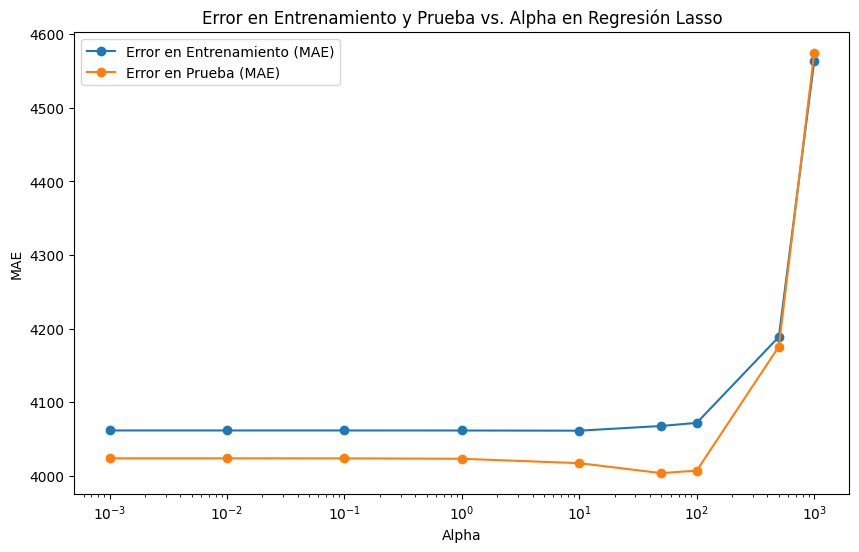

In [ ]:
# Defino la lista de valores de alpha
alpha_values = [0.001, 0.01, 0.1, 1, 10, 50, 100, 500, 1000]

# Listas para guardar los errores
train_errors = []
test_errors = []

# Bucle para ajustar el modelo Lasso con diferentes valores de alpha
for alpha in alpha_values:
    # Configurar el modelo con el valor actual de alpha
    lasso_model = Lasso(alpha=alpha, fit_intercept=True, max_iter=1000, tol=0.0001)

    # Entrenar el modelo en el conjunto de entrenamiento
    lasso_model.fit(X_train, y_train)

    # Calcular el error en el conjunto de entrenamiento
    y_train_pred = lasso_model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_errors.append(train_mae)

    # Calcular el error en el conjunto de prueba
    y_test_pred = lasso_model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_errors.append(test_mae)

# Graficar los errores en función de alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_errors, label='Error en Entrenamiento (MAE)', marker='o')
plt.plot(alpha_values, test_errors, label='Error en Prueba (MAE)', marker='o')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.xscale('log')  # Uso escala logarítmica para alpha
plt.legend()
plt.title('Error en Entrenamiento y Prueba vs. Alpha en Regresión Lasso')
plt.show()